In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


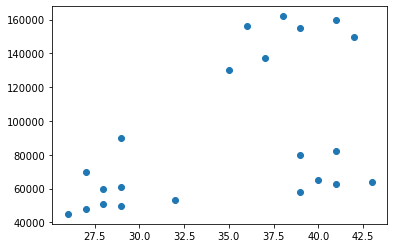

In [4]:
%matplotlib inline
plt.scatter(df['Age'],df['Income($)'])

In [5]:
from sklearn.cluster import KMeans

In [6]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predicated=km.fit_predict(df[['Age','Income($)']])

In [8]:
y_predicated

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [9]:
df['Cluster']=y_predicated

In [10]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [11]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

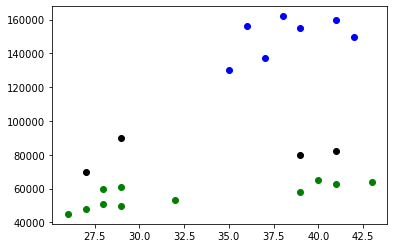

In [12]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='black')

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()

In [15]:
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [16]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [17]:
y_predicated=km.fit_predict(df[['Age','Income($)']])

In [18]:
y_predicated

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [19]:
df['Cluster']=y_predicated

In [20]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


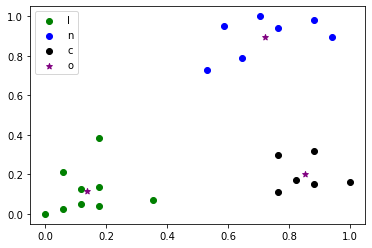

In [21]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='purple',label='Cluster')
plt.legend('Income($)')

In [22]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [23]:
km.inertia_

0.4750783498553097

In [32]:
src=[]
k_rc=range(1,10)
for i in k_rc:
    km=KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    src.append(km.inertia_)

C:\Users\PAVANKUMAR KUNTOLLA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


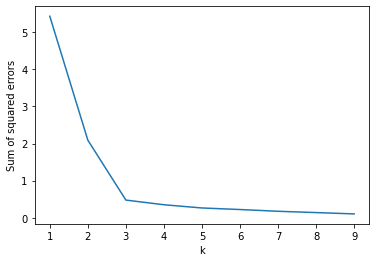

In [36]:
plt.xlabel('k')
plt.ylabel('Sum of squared errors')
plt.plot(k_rc,src)
